# Phân tích tiềm năng KiotViet theo ngành hàng

Phần mềm KiotViet bắt đầu ra mắt vào năm 2014 đến năm 2017 nhận được 2M đầu tư quỹ và mở các chi nhánh đầu tiên tại Đà Nẵng, Nha Trang và Hải Phòng.

Ở đây, ta muốn phân tích sự phát triển của KiotViet qua số lượng gian hàng đăng ký và sử dụng để tìm ra nguyên nhân của việc phát triển của KiotViet.

Do data chỉ có từ 2019 nên ta sẽ nghiên cứu các mốc thời gian từ 2019 trở đi ảnh hưởng đến quá trình kinh doanh KiotViet như thế nào

## Tổng quan số lượng gian hàng

Đầu tiên ta sẽ đi tìm xu hướng số lượng gian hàng được mở mới trong 4 năm 2018-2021


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_alive 
from IPython.display import HTML
from celluloid import Camera
from IPython.display import Image


pd.set_option('display.max_rows', 1000000)
%matplotlib inline

In [2]:
# Dữ liệu số lượng gian hàng theo tháng lấy từ CRM
retailer = pd.read_csv("crm_retailer.csv", parse_dates=['month'])

retailer['Year'] = retailer['month'].dt.year
df_2018 = retailer[retailer['Year'].astype(int) == 2018]
df_2019 = retailer[retailer['Year'].astype(int) == 2019]
df_2020 = retailer[retailer['Year'].astype(int) == 2020]
df_2021 = retailer[retailer['Year'].astype(int) == 2021]

In [3]:
# Tạo dữ liệu theo năm

retailer_pv = retailer.pivot(index = 'month', columns='industry',
                            values = 'no_ret').fillna(0)
df_2018 = df_2018.pivot(index = 'month', columns = 'industry', 
                        values = 'no_ret').fillna(0)
df_2019 = df_2019.pivot(index = 'month', columns = 'industry', 
                        values = 'no_ret').fillna(0)
df_2020 = df_2020.pivot(index = 'month', columns = 'industry', 
                        values = 'no_ret').fillna(0)
df_2021 = df_2021.pivot(index = 'month', columns = 'industry', 
                        values = 'no_ret').fillna(0)

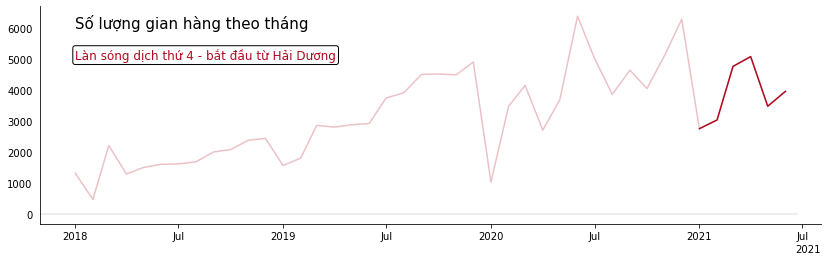

In [4]:
# Tổng gian hàng theo tháng
tol_ret = retailer[retailer['month'] <= '2021-06-01'].groupby('month', as_index = False)['no_ret'].sum()

# Tạo chart animate tổng gian hàng theo tháng
fig, ax = plt.subplots(figsize=(14,4))
camera = Camera(fig)

# tạo point chạy
starts=[24,25,26,27,30,31,33,36]
ends = [26,27,28,31,32,34,37,42]

texts = ['Bắt đầu bùng dịch', 'Làn sóng dịch thứ 2 - BN17', 'Cả nước thực hiện giãn cách xã hội',
       'Mở cửa trở lại', 'Làn sóng dịch thứ 3 - BN416', 'Giãn cách xã hội TP Đà Nẵng','Mở cửa trở lại',
       'Làn sóng dịch thứ 4 - bắt đầu từ Hải Dương']

for start, end, text in zip(starts, ends, texts):
    for i in range(0,5):
        # Main figure
        ax.plot(tol_ret.month, tol_ret.no_ret, color='#b00b1e', alpha=0.25)
        ax.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.tick_params(left=False)
        
        # Title
        ax.text(x=dt.datetime.strptime('2018', '%Y'), y=6000, s='Số lượng gian hàng theo tháng', size=15)

        # Dynamic figure
        ax.plot(tol_ret.month[start:end], tol_ret.no_ret[start:end], color='#b00b1e')
        ax.text(x=dt.datetime.strptime('2018', '%Y'), y=5000, s=text, size=12, color='#b00b1e', bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))
        camera.snap()
        
animation = camera.animate()

HTML(animation.to_html5_video())


Từ năm 2019 đến nay, KiotViet đã ghi nhận tổng cộng 135,008 gian hàng đăng ký mới. Thông thường ta sẽ thấy sự sụt giảm vào tháng 1 đầu năm do nghỉ tết, đặc biệt năm 2020 chịu tác động khá mạnh của dịch Covid bắt đầu bùng phát.

Năm 2018 và 2019 ta thấy trend đi lên rõ ràng từ đầu đến cuối năm tuy nhiên trong 2 năm 2020 và nửa đầu năm 2021 do những tác động của COVID, trend bị gẫy ở những điểm COVID bùng phát dẫn tới giãn cách xã hội, tuy nhiên 2 đỉnh tạo được trong tháng 6 và tháng 12 năm 2021 khi thị trường mở cửa trở lại cho thấy số lượng gian hàng mới vẫn đang tiếp tục đi lên.

Ngoài ra trong những giai đoạn COVID, nhìn chung số lượng gian hàng tăng lên trong thời điểm cùng kỳ hàng năm, có thể suy luận có những ngành hàng không chịu ảnh hưởng nhiều của COVID và ngược lại. Tiếp theo ta sẽ đi phân tích chi tiết từng ngàng hàng để tìm ra những ngành hàng vẫn đang hoạt động tốt.

In [5]:
Image(url ='https://imgur.com/9oalI1N.gif')

10 Ngành hàng có số lượng gian hàng nhiều nhất của KiotViet gồm có:

    * Thời trang
    * Bar - cafe - nhà hàng
    * Tạp hóa
    * Điện thoại và điện máy
    * Mỹ phẩm
    * Siêu thị mini
    * Nông sản và thực phẩm
    * Nhà thuốc
    * Vật liệu xây dựng 
    * Ngành khác
    
Ta sẽ bỏ Ngành khác là biến do Sales nhập vô chỉ nghiên cứu 9 ngành hàng còn lại

## Phân tích ảnh hưởng của COVID

In [6]:
# input dữ liệu số ca covid việt nam theo tháng
covid = pd.read_csv("owid-covid-data.csv")

vn_covid = covid[covid["location"] == "Vietnam"]
vn_covid["date"] = pd.to_datetime(vn_covid["date"])
vn_covid["month"] = pd.to_datetime(vn_covid["date"].copy()).dt.strftime("%m-%Y")
total_vn_covid = vn_covid[["month", "new_cases"]].groupby("month", as_index=False).sum("new_cases")
total_vn_covid["month"] = pd.to_datetime(total_vn_covid["month"])


<ipython-input-6-4d0b7ca97819>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_covid["date"] = pd.to_datetime(vn_covid["date"])
<ipython-input-6-4d0b7ca97819>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_covid["month"] = pd.to_datetime(vn_covid["date"].copy()).dt.strftime("%m-%Y")


Text(0.5, 1.0, 'Correlation theo tháng')

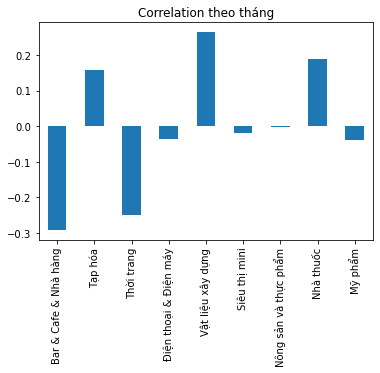

In [7]:
# merge với dữ liệu gian hàng theo từng ngành
ret_cov_combined = pd.merge(retailer_pv[retailer_pv.columns[(retailer_pv != 0).any()]], total_vn_covid,
                            how = "left", on = ["month","month"])
ret_cov_combined = ret_cov_combined[ret_cov_combined["month"] < '2021-07-01']

# Tạo chart correlation giữa số lượng gian hàng các ngành và số lượng ca Covid theo tháng
ind = ["Bar & Cafe & Nhà hàng", "Tạp hóa", "Thời trang", "Điện thoại & Điện máy", "Vật liệu xây dựng",
       "Siêu thị mini", "Nông sản và thực phẩm", "Nhà thuốc", "Mỹ phẩm"]

ret_cov_combined.corr()['new_cases'][ind].plot.bar()
plt.title("Correlation theo tháng")

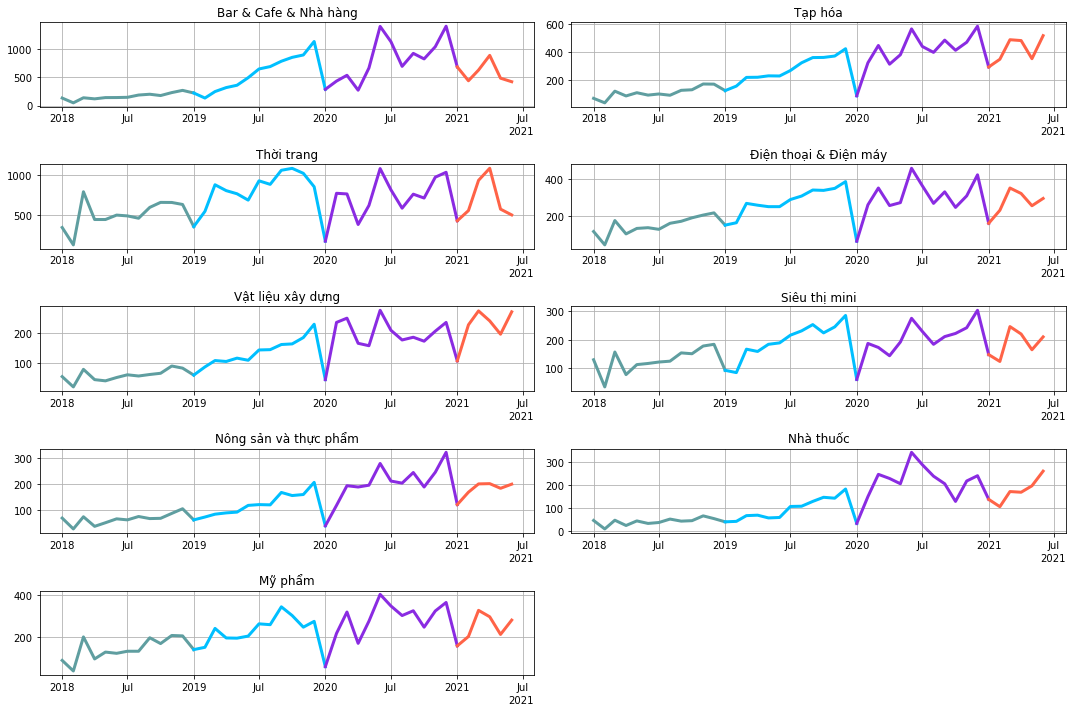

In [8]:
# Filter dữ liệu theo năm
ret_cov_combined_2018 = ret_cov_combined.copy()[ret_cov_combined['month'] <= "2019-01-01"]
ret_cov_combined_2019 = ret_cov_combined.copy()[(ret_cov_combined['month'] <= "2020-01-01") & (ret_cov_combined['month'] >= "2019-01-01")]
ret_cov_combined_2020 = ret_cov_combined.copy()[(ret_cov_combined['month'] <= "2021-01-01") & (ret_cov_combined['month'] >= "2020-01-01")]
ret_cov_combined_2021 = ret_cov_combined.copy()[ret_cov_combined['month'] >= "2021-01-01"]

# Tạo line chart từng ngành hàng theo tháng
plt.figure(figsize=(15,10))
for i, industry in zip(list(range(1, 10)), ind):
    plt.subplot(5,2,i)
    plt.plot(ret_cov_combined_2018['month'],
        ret_cov_combined_2018[industry],
        color = 'cadetblue', linewidth = 3)
    plt.plot(ret_cov_combined_2019['month'],
        ret_cov_combined_2019[industry],
        color = 'deepskyblue', linewidth = 3)
    plt.plot(ret_cov_combined_2020['month'],
        ret_cov_combined_2020[industry],
        color = 'blueviolet', linewidth = 3)
    plt.plot(ret_cov_combined_2021['month'],
        ret_cov_combined_2021[industry],
        color = 'tomato', linewidth = 3)
    plt.title(industry)
    plt.grid()

plt.tight_layout()
plt.show()

<ipython-input-100-db3ad2f9ebef>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<Figure size 1080x720 with 0 Axes>

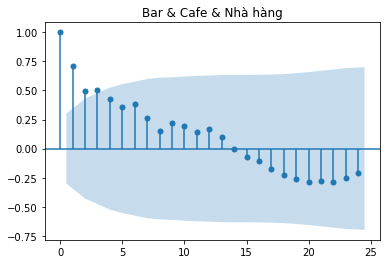

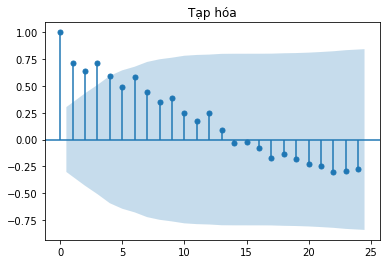

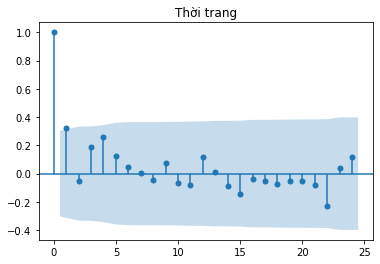

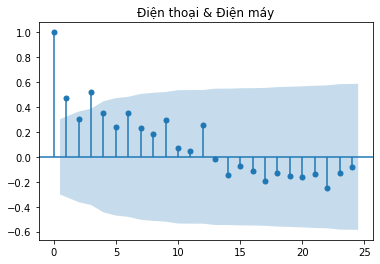

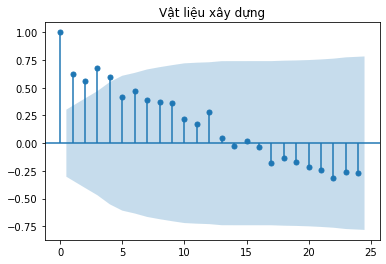

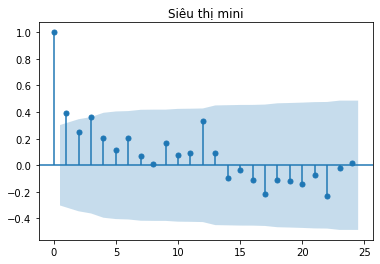

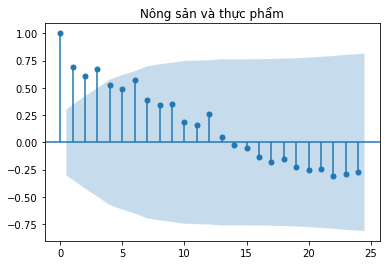

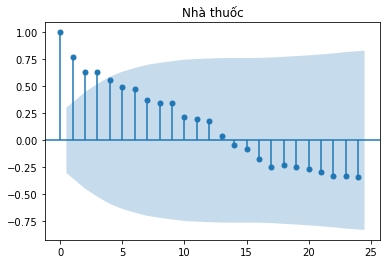

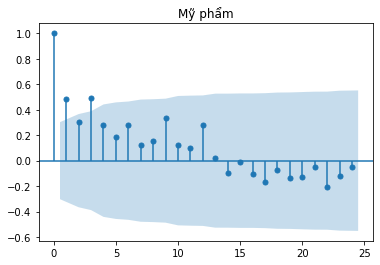

In [100]:
plt.figure(figsize=(15,10))
for i, industry in zip(list(range(1, 10)), ind):
    plot_acf(
        ret_cov_combined[industry], lags = 24)
    plt.title(industry)

plt.show()

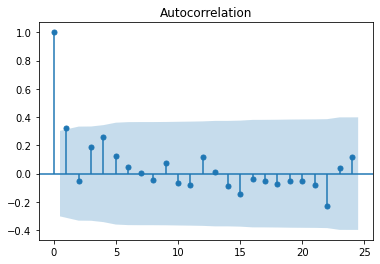

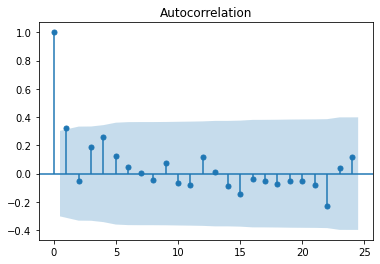

In [91]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ret_cov_combined["Thời trang"], lags=24)

Text(0.5, 1.0, 'Correlation theo ngày')

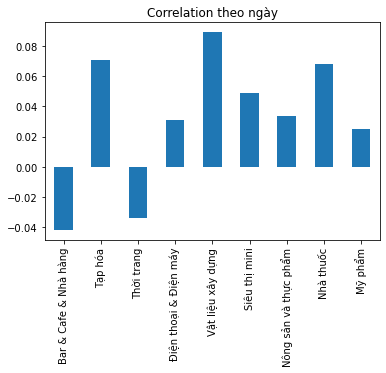

In [9]:
# input dữ liệu gian hàng theo ngày
daily = pd.read_csv("daily.csv", parse_dates=["date"])

daily_pv = daily.pivot(index = "date",
                       columns = "industry",
                       values = "ret").fillna(0)

combined_c_r = pd.merge(daily_pv, vn_covid[["date", "new_cases"]],
                       how = "left", on = ["date", "date"]).fillna(0)

# Tạo chart correlation giữa số lượng gian hàng các ngành và số lượng ca Covid theo ngày
combined_c_r.corr()['new_cases'][ind].plot.bar()
plt.title("Correlation theo ngày")

Các ngành chịu tác động tiêu cực của COVID, khi số ca tăng lên số lượng gian hàng tăng mới giảm xuống gồm có:

* Bar - nhà hàng - cafe
* Thời trang

Các ngành chịu tác động tích cực gồm có:

* Vật liệu xây dựng
* Nhà thuốc
* Tạp hóa

Các ngàng không chịu tác động mấy:
* Nông sản & thực phẩm
* Siêu thị mini
* Điện thoại & điện máy

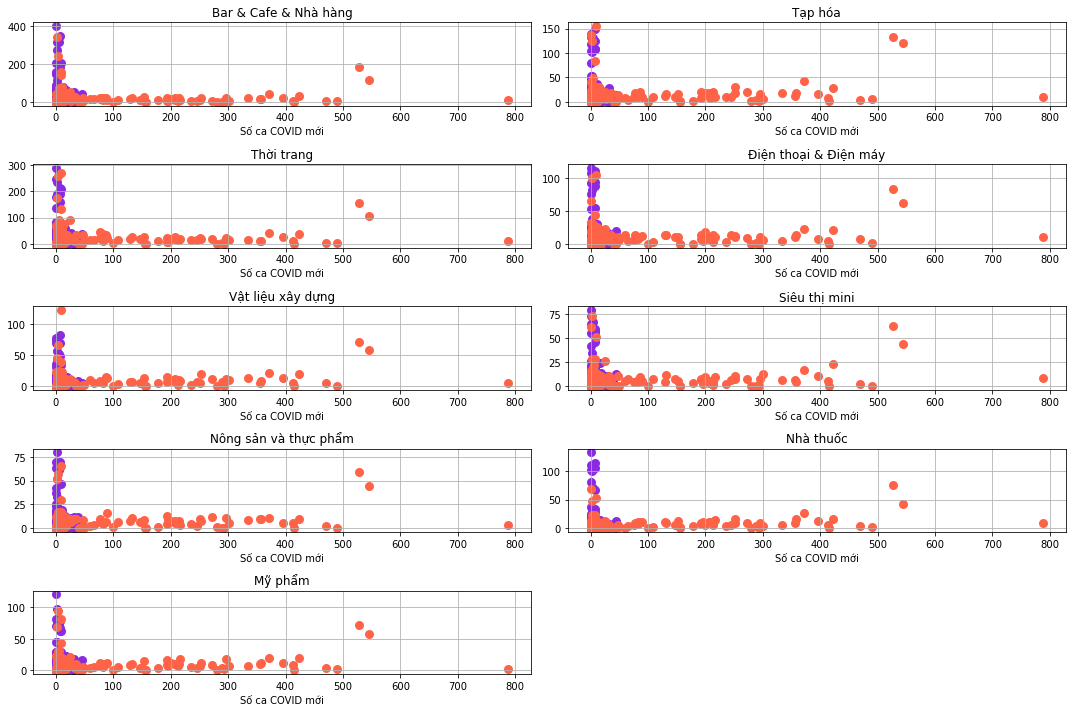

In [10]:
# Filter dữ liệu theo năm
combined_c_r_2020 = combined_c_r.copy()[(combined_c_r['date'] <= "2021-01-01") & (combined_c_r['date'] >= "2020-01-01")]
combined_c_r_2021 = combined_c_r.copy()[combined_c_r['date'] >= "2021-01-01"]

# Tạo scatter chart giữa số lượng gian hàng và số ca COVID theo ngày
plt.figure(figsize=(15,10))
for i, industry in zip(list(range(1, 10)), ind):
    plt.subplot(5,2,i)
    plt.scatter(combined_c_r_2020['new_cases'],
        combined_c_r_2020[industry],
        color = 'blueviolet', linewidth = 3)
    plt.scatter(combined_c_r_2021['new_cases'],
        combined_c_r_2021[industry],
        color = 'tomato', linewidth = 3)
    plt.title(industry)
    plt.xlabel("Số ca COVID mới")
    plt.grid()

plt.tight_layout()
plt.show()

In [11]:
# Tạo anime bar chart ngành hàng theo tháng
# set up figure to pass onto `pandas_alive`

def current_total(values):
    total = values.sum()
    s = f'Total : {int(total)}'
    return {'x': .85, 'y': .2, 's': s, 'ha': 'right', 'size': 20}

fig1 = plt.Figure()
ax1 = fig1.add_subplot()
ax1.set_title("Top 10 Industries in 2019", fontsize=20)


anim_2019 = df_2019.plot_animated(filename = "id_2019.gif", n_visible=10,period_fmt="%m/%Y", 
                      period_length = 4000,fixed_max=True,perpendicular_bar_func='mean',
                      period_summary_func = current_total,
                      enable_progress_bar=True , fig=fig1, figsize = (10,5), bar_label_size = 16,
                      tick_label_size = 14)
plt.close()

Generating BarChartRace, plotting ['Bar & Cafe & Nhà hàng', 'Bánh ngọt', 'Chuyển phát nhanh', 'Giặt là', 'Hoa & Quà tặng', 'In ấn quảng cáo', 'Mẹ & bé', 'Mỹ phẩm', 'Ngành khác', 'Nhà nghỉ', 'Nhà thuốc', 'Nông sản và thực phẩm', 'Nội thất', 'Salon tóc', 'Siêu thị mini', 'Spa', 'Studio', 'Sách & VPP', 'Thời trang', 'Tạp hóa', 'Vàng bạc', 'Vật liệu xây dựng', 'Xe & máy & linh kiện', 'Điện thoại & Điện máy']


In [12]:
fig4 = plt.Figure()
ax4 = fig4.add_subplot()
ax4.set_title("Top 10 Industries in 2018", fontsize=20)


anim_2018 = df_2018.plot_animated(filename = "ind_2018.gif", n_visible=10,period_fmt="%m/%Y", 
                      period_length = 4000,fixed_max=True,perpendicular_bar_func='mean',
                      period_summary_func = current_total,
                      enable_progress_bar=True , fig=fig4, figsize = (10,5), bar_label_size = 16,
                      tick_label_size = 14)
plt.show()

Generating BarChartRace, plotting ['Bar & Cafe & Nhà hàng', 'Giặt là', 'Hoa & Quà tặng', 'In ấn quảng cáo', 'Mẹ & bé', 'Mỹ phẩm', 'Ngành khác', 'Nhà thuốc', 'Nông sản và thực phẩm', 'Nội thất', 'Siêu thị mini', 'Spa', 'Studio', 'Sách & VPP', 'Thời trang', 'Tạp hóa', 'Vàng bạc', 'Vật liệu xây dựng', 'Xe & máy & linh kiện', 'Điện thoại & Điện máy']


In [13]:
fig2 = plt.Figure()
ax2 = fig2.add_subplot()
ax2.set_title("Top 10 Industries in 2020", fontsize=20)


anim_2020 = df_2020.plot_animated(filename = "ind_2020.gif", n_visible=10,period_fmt="%m/%Y", 
                      period_length = 4000,fixed_max=True,perpendicular_bar_func='mean',
                      period_summary_func = current_total,
                      enable_progress_bar=True , fig=fig2, figsize = (10,5), bar_label_size = 16,
                      tick_label_size = 14)
plt.show()

Generating BarChartRace, plotting ['Bar & Cafe & Nhà hàng', 'Bánh ngọt', 'Chuyển phát nhanh', 'Giặt là', 'Hoa & Quà tặng', 'In ấn quảng cáo', 'Mẹ & bé', 'Mỹ phẩm', 'Ngành khác', 'Nhà nghỉ', 'Nhà thuốc', 'Nông sản và thực phẩm', 'Nội thất', 'Salon tóc', 'Siêu thị mini', 'Spa', 'Studio', 'Sách & VPP', 'Thời trang', 'Tín dụng', 'Tạp hóa', 'Vàng bạc', 'Vật liệu xây dựng', 'Xe & máy & linh kiện', 'Điện thoại & Điện máy']


In [14]:
fig3 = plt.Figure()
ax3 = fig3.add_subplot()
ax3.set_title("Top 10 Industries in 2021", fontsize=20)

anim_2021 = df_2021.plot_animated(filename = "ind_2021.gif", n_visible=10,period_fmt="%m/%Y", 
                      period_length = 4000,fixed_max=True,perpendicular_bar_func='mean',
                      period_summary_func = current_total,
                      enable_progress_bar=True , fig=fig3, figsize = (10,5), bar_label_size = 16,
                      tick_label_size = 14)
plt.show()

Generating BarChartRace, plotting ['Bar & Cafe & Nhà hàng', 'Bar - Cafe - Nhà hàng', 'Bánh ngọt', 'Giặt là', 'Hoa & Quà tặng', 'In ấn quảng cáo', 'Khác', 'Mẹ & Bé', 'Mẹ & bé', 'Mỹ phẩm', 'Ngành khác', 'Nhà nghỉ', 'Nhà thuốc', 'Nông sản & Thực phẩm', 'Nông sản và thực phẩm', 'Nội thất', 'Nội thất & Gia dụng', 'Salon tóc', 'Siêu thị mini', 'Spa', 'Studio', 'Sách & VPP', 'Sách & Văn phòng phẩm', 'Thời trang', 'Tín dụng', 'Tạp hóa', 'Vàng bạc', 'Vật liệu xây dựng', 'Xe & máy & linh kiện', 'Xe Máy & Linh Kiện', 'Điện thoại & Điện máy', 'Điện tử - Điện máy']


In [15]:
fig_bar = plt.Figure(figsize=(15, 10), dpi=100)
ax_bar = fig_bar.add_subplot()

anim_bar = retailer_pv.plot_animated(n_visible=10,period_fmt="%m/%Y", 
                      period_length = 1500,fixed_max=True,perpendicular_bar_func='mean',
                      enable_progress_bar=True , fig=fig_bar, bar_label_size = 14,
                      tick_label_size = 12)
plt.show()

Generating BarChartRace, plotting ['Bar & Cafe & Nhà hàng', 'Bar - Cafe - Nhà hàng', 'Bánh ngọt', 'Chuyển phát nhanh', 'Giặt là', 'Hoa & Quà tặng', 'In ấn quảng cáo', 'Khác', 'Mẹ & Bé', 'Mẹ & bé', 'Mỹ phẩm', 'Ngành khác', 'Nhà nghỉ', 'Nhà thuốc', 'Nông sản & Thực phẩm', 'Nông sản và thực phẩm', 'Nội thất', 'Nội thất & Gia dụng', 'Salon tóc', 'Siêu thị mini', 'Spa', 'Studio', 'Sách & VPP', 'Sách & Văn phòng phẩm', 'Thời trang', 'Tín dụng', 'Tạp hóa', 'Vàng bạc', 'Vật liệu xây dựng', 'Xe & máy & linh kiện', 'Xe Máy & Linh Kiện', 'Điện thoại & Điện máy', 'Điện tử - Điện máy']


In [16]:
from matplotlib import rcParams
rcParams.update({"figure.autolayout": False})
fontsize="x-small"
figs = plt.Figure(figsize=(15, 15), dpi=100)
figs.subplots_adjust(top = 0.1, bottom = 0, right = 0.1, left = 0, wspace = 0.1)


ax1 = figs.add_subplot(411)
ax1.tick_params(labelsize=fontsize)

ax2 = figs.add_subplot(412)
ax2.tick_params(labelsize=fontsize)

ax3 = figs.add_subplot(413)
ax3.tick_params(labelsize=fontsize)

ax4 = figs.add_subplot(414)
ax4.tick_params(labelsize=fontsize)


anim_2018.ax = ax1
anim_2019.ax = ax2
anim_2020.ax = ax3
anim_2021.ax = ax4

plots = [anim_2018, anim_2019, anim_2020, anim_2021]

ani = pandas_alive.animate_multiple_plots(
      filename = 'top-ind.mp4',
      plots=plots, custom_fig=figs,
      enable_progress_bar=True 
)
plt.close()

## Phân tích ảnh hưởng của MKT



Text(0.5, 1.0, 'Correlation theo tháng')

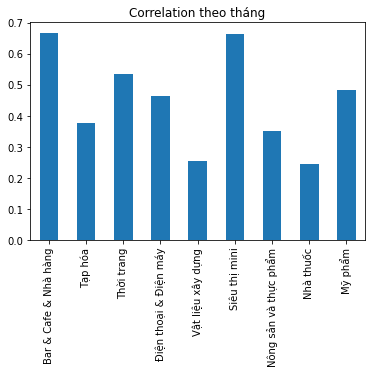

In [53]:
# Input dữ liệu mkt cost
MKT_cost = pd.read_csv("BI-382 expense.csv", parse_dates=['Date'])

# Tạo cột tháng
MKT_cost['month'] = MKT_cost['Date'].dt.strftime("%m-%Y")
MKT_month = MKT_cost.groupby("month", as_index = False)['Cost_Cut-Off'].sum()
MKT_month['month'] = pd.to_datetime(MKT_month['month'])

# merge với dữ liệu gian hàng theo tháng
ret_mkt_combined = pd.merge(retailer_pv[retailer_pv.columns[(retailer_pv != 0).any()]], MKT_month,
                            how = "inner", on = ["month","month"])
ret_mkt_combined = ret_mkt_combined[ret_mkt_combined['month'] < '2021-07-01']

# tạo correlation chart giữa chi phí mkt và số lượng gian hàng theo tháng
ret_mkt_combined.corr()['Cost_Cut-Off'][ind].plot.bar()
plt.title("Correlation theo tháng")

<ipython-input-55-0f8194f403f5>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


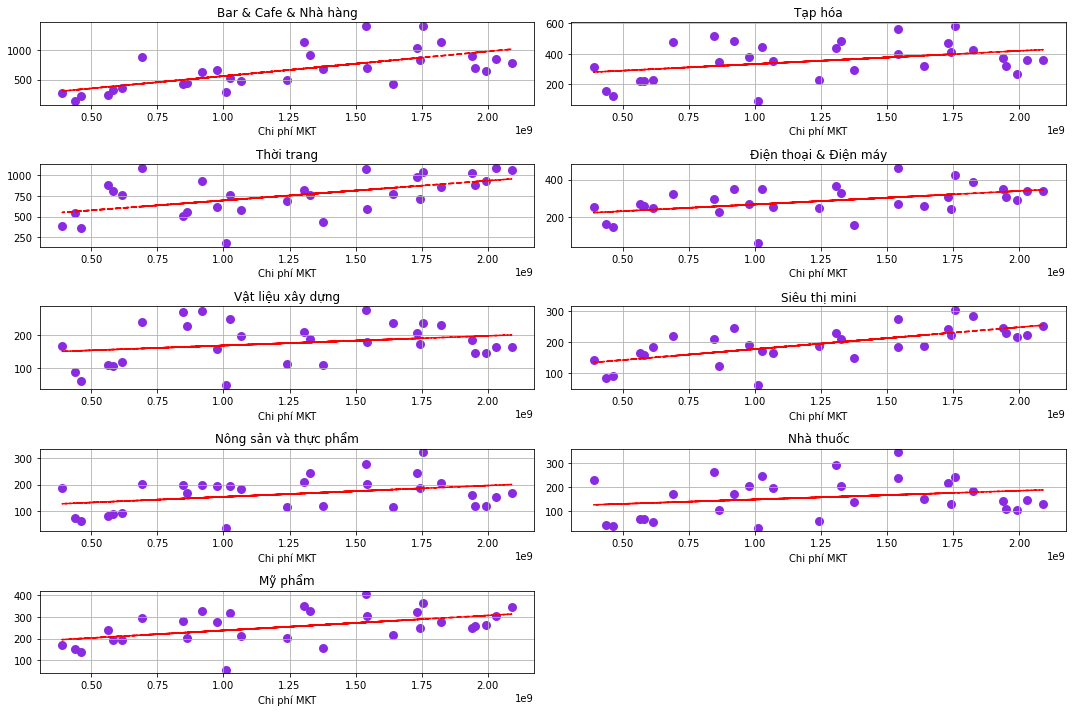

In [55]:
# tạo scatter chart giữa chi phí mkt và số lượng gian hàng theo tháng
plt.figure(figsize=(15,10))
for i, industry in zip(list(range(1, 10)), ind):
    z = np.polyfit(ret_mkt_combined['Cost_Cut-Off'], ret_mkt_combined[industry], 1)
    p = np.poly1d(z)
    plt.subplot(5,2,i)
    plt.scatter(ret_mkt_combined['Cost_Cut-Off'],
        ret_mkt_combined[industry],
        color = 'blueviolet', linewidth = 3)
    plt.plot(ret_mkt_combined['Cost_Cut-Off'],p(ret_mkt_combined['Cost_Cut-Off']),"r--")
    plt.title(industry)
    plt.xlabel("Chi phí MKT")
    plt.grid()

plt.tight_layout()
plt.show()

## Phân tích ảnh hưởng của SL chi nhánh và nhân viên sales

Text(0.5, 1.0, 'Correlation SLCN theo tháng')

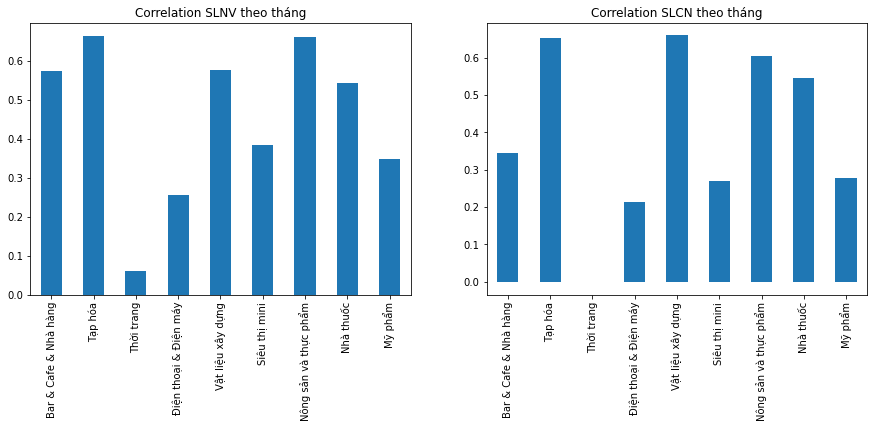

In [69]:
# Input dữ liệu số lượng nhân viên sales và chi nhánh
emp = pd.read_csv("SLNV sales.csv", parse_dates=["month"])

# Merge với giữ liệu gian hàng
ret_emp_combined = pd.merge(retailer_pv[retailer_pv.columns[(retailer_pv != 0).any()]], emp,
                            how = "inner", on = ["month","month"])

# tạo correlation chart giữa số lượng nhân viên sales, chi nhánh và số lượng gian hàng theo tháng
plt.figure(figsize=(15,5))
plt.subplot(121)
ret_emp_combined.corr()['slnv'][ind].plot.bar()
plt.title("Correlation SLNV theo tháng")
plt.subplot(122)
ret_emp_combined.corr()['slcn'][ind].plot.bar()
plt.title("Correlation SLCN theo tháng")

<ipython-input-70-e1d7b3e890a7>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


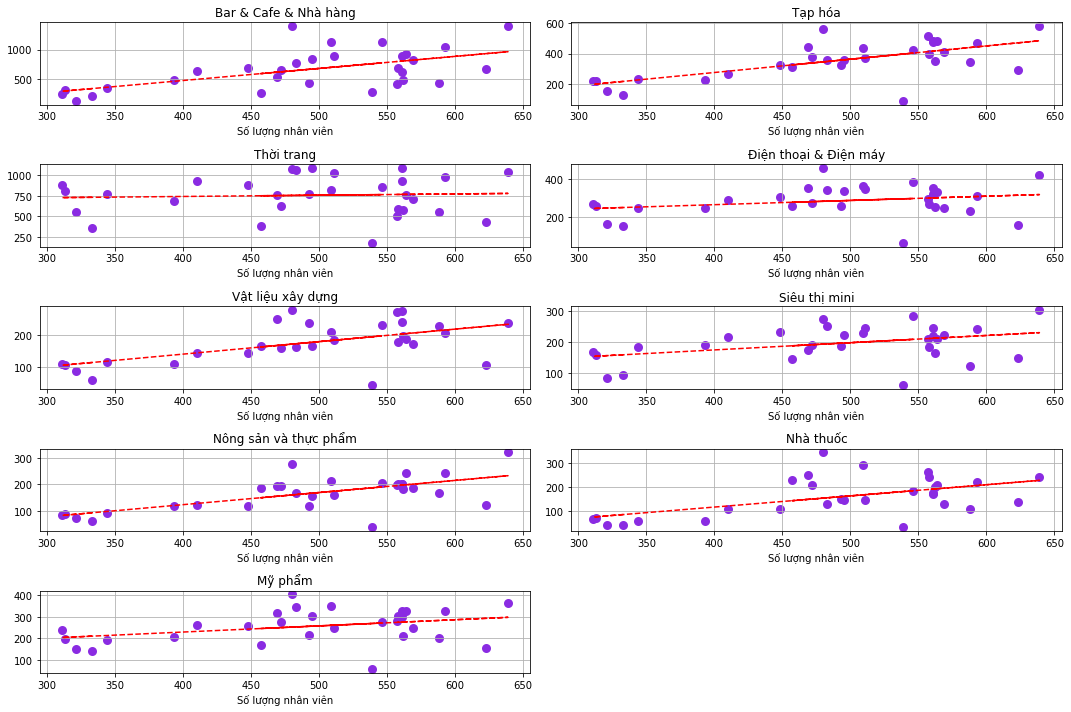

In [70]:
# tạo scatter chart giữa slnv chi nhánh và số lượng gian hàng theo tháng
plt.figure(figsize=(15,10))
for i, industry in zip(list(range(1, 10)), ind):
    z = np.polyfit(ret_emp_combined['slnv'], ret_emp_combined[industry], 1)
    p = np.poly1d(z)
    plt.subplot(5,2,i)
    plt.scatter(ret_emp_combined['slnv'],
        ret_emp_combined[industry],
        color = 'blueviolet', linewidth = 3)
    plt.plot(ret_emp_combined['slnv'],p(ret_emp_combined['slnv']),"r--")
    plt.title(industry)
    plt.xlabel("Số lượng nhân viên")
    plt.grid()

plt.tight_layout()
plt.show()

<ipython-input-71-6569299b2567>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


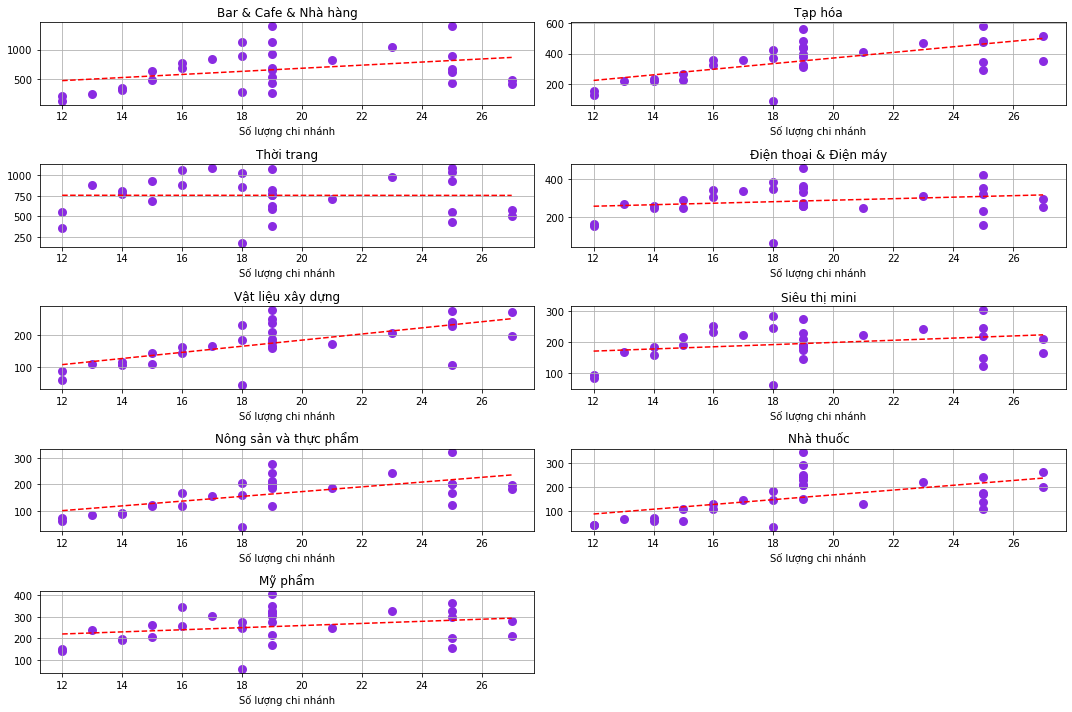

In [71]:
# tạo scatter chart giữa slnv chi nhánh và số lượng gian hàng theo tháng
plt.figure(figsize=(15,10))
for i, industry in zip(list(range(1, 10)), ind):
    z = np.polyfit(ret_emp_combined['slcn'], ret_emp_combined[industry], 1)
    p = np.poly1d(z)
    plt.subplot(5,2,i)
    plt.scatter(ret_emp_combined['slcn'],
        ret_emp_combined[industry],
        color = 'blueviolet', linewidth = 3)
    plt.plot(ret_emp_combined['slcn'],p(ret_emp_combined['slcn']),"r--")
    plt.title(industry)
    plt.xlabel("Số lượng chi nhánh")
    plt.grid()

plt.tight_layout()
plt.show()